# PREPARATION

In [1]:
import gzip, idx2numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [7]:
# FIX CONSTANT
CLASS = 10
THRESH = 100
MAX_EPOCHS = 10
N_SAMPLE_PLOT = 10

# LOAD DATA

In [3]:
# LOAD TRAIN AND TEST DATA
data = ['train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz']

for idx, filename in enumerate(data):
     with gzip.open('dataset/' + filename, 'rb') as f:
        temp = f.read()
        data[idx] = idx2numpy.convert_from_string(temp)

[X_train, y_train_label, X_test, y_test_label] = data
# print Train and Test data size
print('Train:', X_train.shape, y_train_label.shape)
print('Test: ', X_test.shape, y_test_label.shape)

Train: (60000, 28, 28) (60000,)
Test:  (10000, 28, 28) (10000,)


Each sample data is 28x28 pixel of handwritten image, convert to numpy array consist of integer between 0-255

# PREPROCESSING

In [4]:
def masking(x, thresh):
    """Masking image for simplify data.
    Convert data to binary, each pixel greater or equal to threshold will convert as 1
    """
    if x >= thresh:
        temp = 1
    else:
        temp = 0
    return temp
masking_v = np.vectorize(masking)

In [5]:
# Masking feature data
X_train = masking_v(X_train, THRESH)
X_test = masking_v(X_test, THRESH)

# One hot encode label data
y_train = np.eye(CLASS)[y_train_label]
y_test = np.eye(CLASS)[y_test_label]

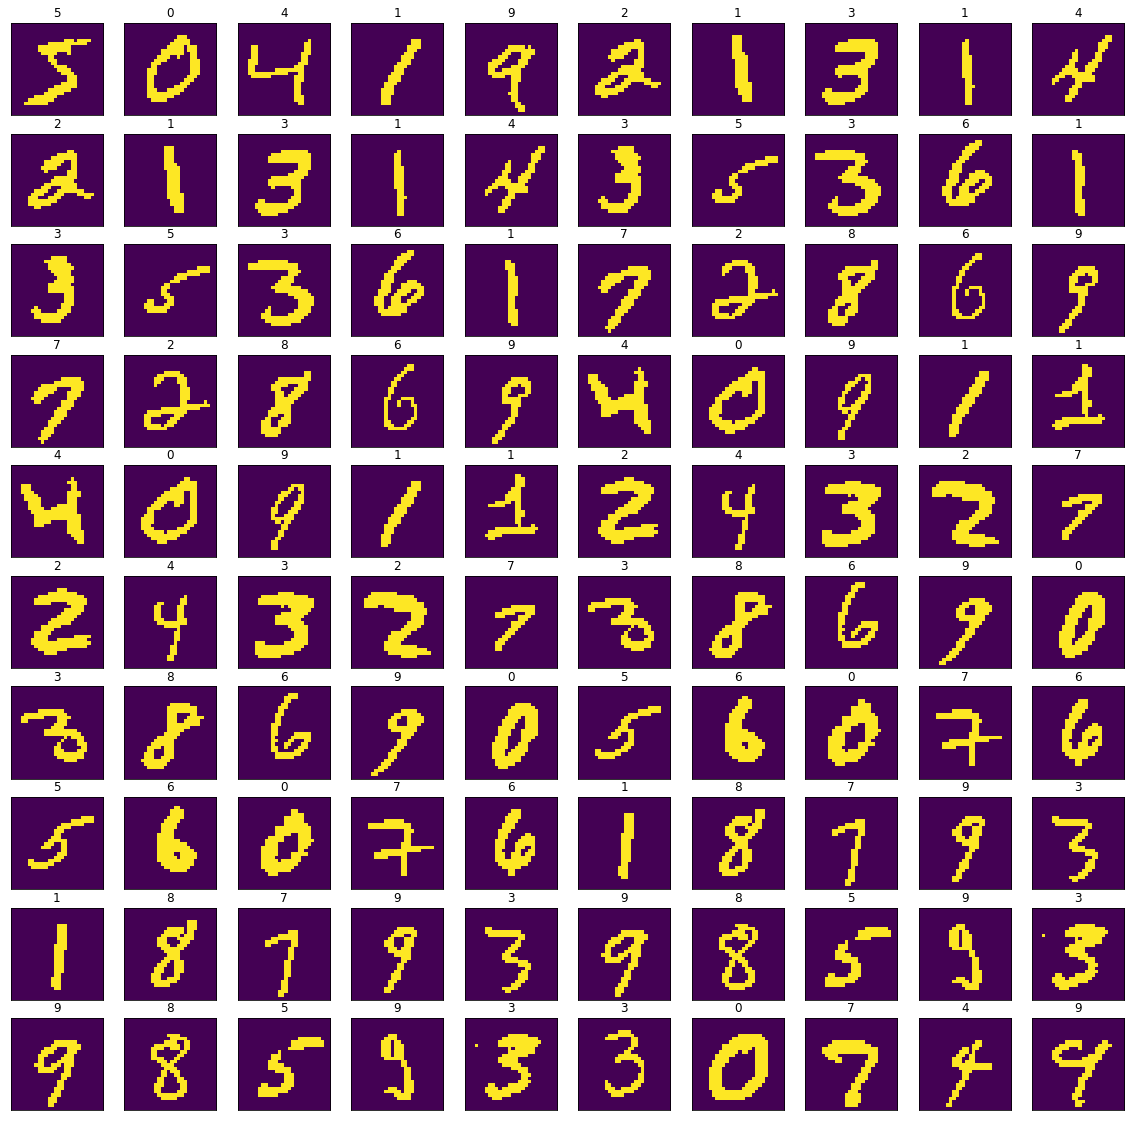

In [11]:
# Plot some sample
n = N_SAMPLE_PLOT
fig, ax = plt.subplots(n, n, sharex=False, sharey=False, figsize=(n*2,n*2))
for i in range(n):
    for j in range(n):
        ax[i,j].imshow(X_train[i*5 + j])
        ax[i,j].set_title(y_train_label[i*5 + j])
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

In [14]:
x = []
for i in range(100):
    a = (np.sum(X_train[i],1) > 0)*1
    b = np.sum(np.sum(X_train[i],0) > 0)
    x.append(a)

In [15]:
x

[array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0]),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        

In [32]:
# Reshape each sample to 1 dimension
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(10000, -1)

In [44]:
# print Train and Test data size
print('            X           y')
print('Train:', X_train.shape, y_train_label.shape)
print('Test: ', X_test.shape, y_test_label.shape)

            X           y
Train: (60000, 784) (60000,)
Test:  (10000, 784) (10000,)


# TRAIN MODEL

### MODEL 1. Logistic Regression

In [49]:
# Create model
model = LogisticRegression()
print(model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [51]:
model.fit(X_train, y_train_label)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


KeyboardInterrupt: 

In [42]:
# CREATE MODEL 
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(20, activation='relu'))
model.add(Dense(CLASS, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_11 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(X_train, y_train, epochs=MAX_EPOCHS)

Epoch 1/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.4116 - accuracy: 0.8793
Epoch 2/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.2181 - accuracy: 0.9364
Epoch 3/10
60000/60000 [==============================] - 5s 75us/step - loss: 0.1801 - accuracy: 0.9469
Epoch 4/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.1592 - accuracy: 0.9513
Epoch 5/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.1420 - accuracy: 0.9568
Epoch 6/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.1306 - accuracy: 0.9604
Epoch 7/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.1230 - accuracy: 0.9622
Epoch 8/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.1149 - accuracy: 0.9644
Epoch 9/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.1095 - accuracy: 0.9667
Epoch 10/10
60000/60000 [==============================

In [44]:
print ("train score: ",round(model.evaluate(X_train, y_train)[1]*100, 2) , "%")
print ("test score : ",round(model.evaluate(X_test, y_test)[1]*100, 2) , "%")

60000/60000 [==============================] - 2s 37us/step
train score:  97.33 %
10000/10000 [==============================] - 0s 38us/step
test score :  95.58 %


In [27]:
model.predict(X_train[0].reshape(1,784)).argmax()

5

In [29]:
# model.save('model.h5')

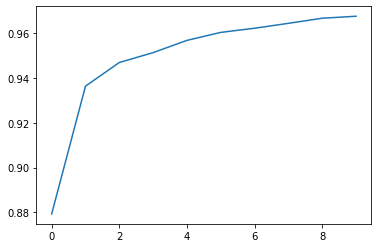

In [47]:
# plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

In [54]:
d = {'a':1, 'b':2, 'c':3}

In [56]:
d = dict(a=1,b=2,c=3)

In [68]:
d.values()

dict_values([1, 2, 3])